# Sterling Numbers of the Second Kind
**A Non-Rigorous Definition:**
Number of ways to partition a set of n elements into k non-empty sets.

**Notation:**
S(n,k)

**Formula:**
<img src="SterlingFormula.gif">

In [341]:
from math import factorial
from math import pow
from math import floor
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [342]:
# Calculate a single sterling number
def S(n, k):
    return int(sum(
                [
                    pow(-1,i)
                    * scipy.special.comb(k, i, exact=True)
                    * pow((k-i), n)
                    for i in range(k)
                ]
            ) / factorial(k))

In [369]:
# makes the triangle of the
def make_triangle(upper_n):

    return [
                [
                    S(x,y) 
                    for y in range(1,x+1)
                ] 
            for x in range(1,upper_n+1)]

    

def print_triangle(upper_n):
    print(*make_triangle(upper_n), sep='\n')  
print_triangle(12)

[1]
[1, 1]
[1, 3, 1]
[1, 7, 6, 1]
[1, 15, 25, 10, 1]
[1, 31, 90, 65, 15, 1]
[1, 63, 301, 350, 140, 21, 1]
[1, 127, 966, 1701, 1050, 266, 28, 1]
[1, 255, 3025, 7770, 6951, 2646, 462, 36, 1]
[1, 511, 9330, 34105, 42525, 22827, 5880, 750, 45, 1]
[1, 1023, 28501, 145750, 246730, 179487, 63987, 11880, 1155, 55, 1]
[1, 2047, 86526, 611501, 1379400, 1323652, 627396, 159027, 22275, 1705, 66, 1]


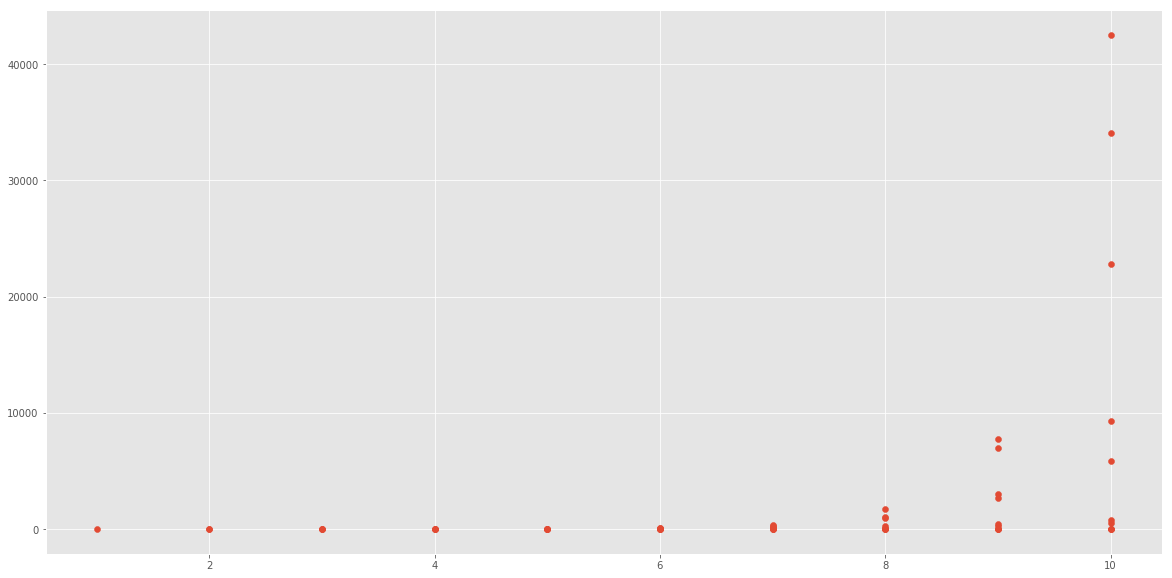

In [346]:

def visualize_sterling_2(upper_n):
    
    triangle = make_triangle(upper_n)
    n = []
    for i in range(1,upper_n+1):
        x = i * [i]
        n.extend(x)
    n = np.array(n)

    flatten = lambda t: [item for sublist in t for item in sublist]
    flat_triangle = np.array(flatten(triangle))
    
    
    fig, ax = plt.subplots()
    ax.scatter(n, flat_triangle)
    ax.ticklabel_format(style='plain')

    plt.show()
visualize_sterling_2(10)

In [347]:
def find_max_sterling(p):
    return p[-1].index(max(p[-1]))

In [348]:
for i in range(1,20):
    max_k = np.array([find_max_sterling(make_triangle(i)) for i in range(1,20)])
    n = np.array([i for i in range(1,20)])

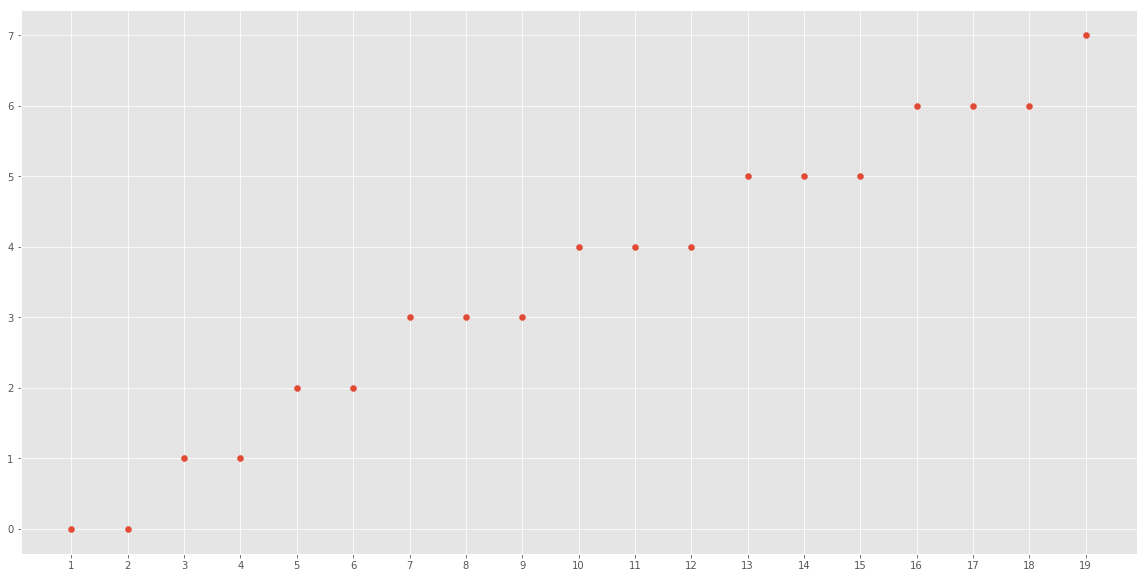

In [349]:
plt.scatter(n, max_k)
plt.xticks(n)
plt.show()

In [409]:
# def max_k_for_n(n):
#     return floor((n-1)/2)

# def max_k_up_to_n(n):
#     l = [max_k_for_n(i) for i in range(1,n+1)]
#     return l

# def max_partitions_up_to_n(n):
#     triangle = make_triangle(n)
#     max_partitions = [max(triangle[i]) for i in range(len(triangle))]
#     return max_partitions

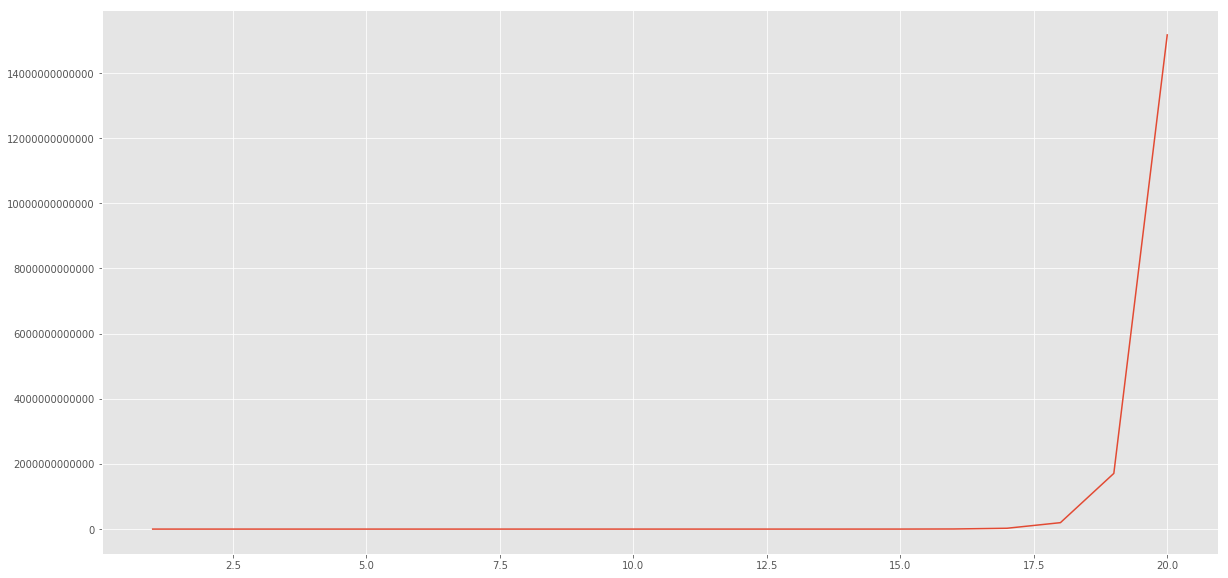

In [351]:
def plot_max_partitions_for_n(n):
    
    max_part = np.array(max_partitions_up_to_n(n))
    n = np.array(range(1,n+1))
    
    fig, ax = plt.subplots()
    ax.plot(n, max_part)
    ax.ticklabel_format(style='plain')

    plt.show()
    
plot_max_partitions_for_n(20)

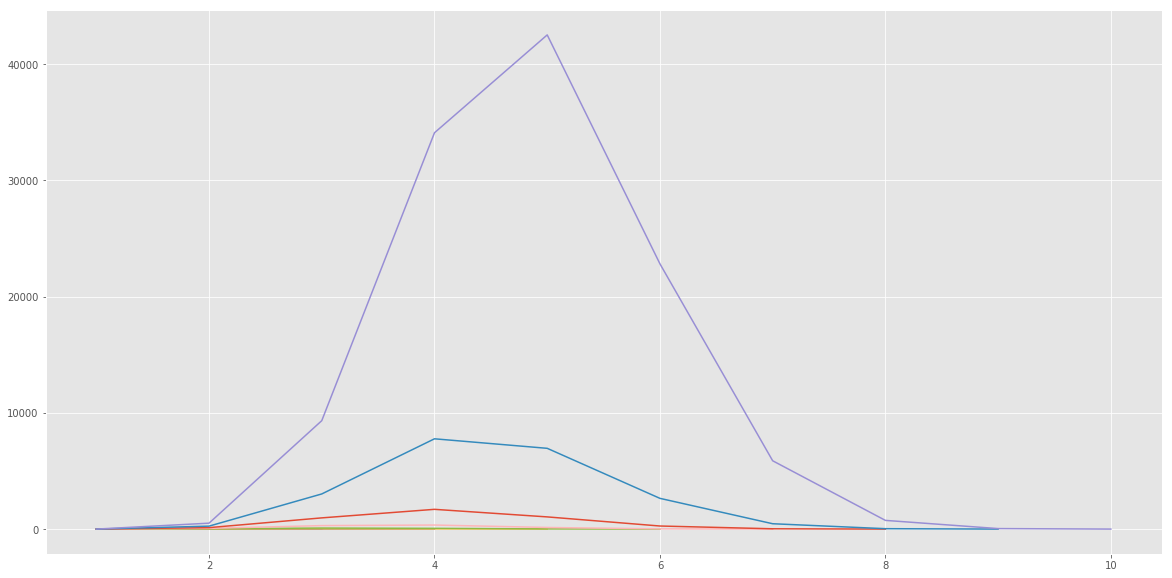

In [362]:
def dist_single_num(n):
    
    triangle = make_triangle(n)
    fig, ax = plt.subplots()
    ax.ticklabel_format(style='plain')

    for i in triangle:
        len_row = len(i)
        row = np.array(i)
        k_vals = np.array(range(1,len_row+1))
        ax.plot(k_vals, row)

#     t = np.array(make_triangle(n)[n-1])
#     k_vals = np.array(range(1,len(t)+1))
    

    plt.show()
    
dist_single_num(10)

In [576]:
class Sterling_Second_Kind:
    def __init__(self, n):
        
        # makes the sterling triangle for numbers 1 to n
        self.n = n
        self.triangle = self.create_triangle()
    
    def create_triangle(self):
        
        return [
                    [
                        S(x,y) 
                        for y in range(1,x+1)
                    ] 
                for x in range(1,self.n+1)]
    
    def print_triangle(self):
        
        print(*self.triangle, sep='\n')  
    
    # the value of k for a given n which generates the highest number of
    # partitions - the highest sterling number of the second kind
    # todo: variables
    def get_k_of_max_partitions_for_n(self, n):
        
        return floor((n+1)/2)

    # the value of k which generates the most partitions for all values 
    # from 1 to N
    # todo: variables
    def get_k_of_max_partitions_for_triangle(self):
        
        k = [self.get_k_of_max_partitions_for_n(i) for i in range(1, self.n+1)]
        return k

    # returns the max number of partitions for each number in triangle from
    # 1 to n. Max number can be found by S(n,k) where k = floor((n-1)/2)
    def max_partitions_up_to_n(self):

        max_partitions = [S(i, self.get_k_of_max_partitions_for_n(i)) for i in range(1,self.n+1)]
        return max_partitions
    
    ### Visualization Methods
    # todo: rename this method
    def visualize_sterling_2(self):

        n_vals = []
        k_vals = []
        for i in range(1, self.n+1):
            
            # each value i from 1 to n must be repeated i times in the array 
            # because each i corresponds to i values of k in the triangle
            # where k goes from 1 to n
            x = i * [i]
            n_vals.extend(x)
            
            # values of k for each i from 1 to n where k goes from 1 to n, 
            # multiplied by 100 to dramatize the value of k in the visual
            k_vals.extend(
                [
                    x*100 for x in range(1,i+1)
                ]
            )
        
        n_vals = np.array(n_vals)

        # change the shape of the triangle into a single list, rather
        # than a list of lists then convert to np array
        flatten = lambda t: [item for sublist in t for item in sublist]
        flat_triangle = np.array(flatten(self.triangle))
        
        fig, ax = plt.subplots()
        ax.scatter(n_vals, flat_triangle, s=k_vals, alpha=0.5)
        ax.ticklabel_format(style='plain')
        plt.show()
        
    def dist_num_partitions(self):
    
        fig, ax = plt.subplots()
        ax.ticklabel_format(style='plain')

        for i in self.triangle:
            len_row = len(i)
            row = np.array(i)
            k_vals = np.array(range(1,len_row+1))
            ax.plot(k_vals, row)

    #     t = np.array(make_triangle(n)[n-1])
    #     k_vals = np.array(range(1,len(t)+1))
    

    plt.show()    
    
    # static method
    def S(n, k):
        return int(sum(
                    [
                        pow(-1,i)
                        * scipy.special.comb(k, i, exact=True)
                        * pow((k-i), n)
                        for i in range(k)
                    ]
                ) / factorial(k))

# Examples Using Sterling2 Class
Instantiate a sterling number of the second kind class for n=10 which represents the sterling triangle from 1 to n for all values of k from 1 to n.

**Properties:**

By looking at the triangle, it is clear that `S(n, 1) = 1` and `S(n, n) = 1` for all values of n.

In [577]:
sn = Sterling_Second_Kind(10)
sn.print_triangle()

[1]
[1, 1]
[1, 3, 1]
[1, 7, 6, 1]
[1, 15, 25, 10, 1]
[1, 31, 90, 65, 15, 1]
[1, 63, 301, 350, 140, 21, 1]
[1, 127, 966, 1701, 1050, 266, 28, 1]
[1, 255, 3025, 7770, 6951, 2646, 462, 36, 1]
[1, 511, 9330, 34105, 42525, 22827, 5880, 750, 45, 1]


Numbers of partitions for each value of n increase and fall for k going from 1 to n. The number of subsets k which will produce the most partitions is equal to `floor( n + 1 / 2 )`.

In [578]:
print(*sn.get_k_of_max_partitions_for_triangle(), sep=', ')

1, 1, 2, 2, 3, 3, 4, 4, 5, 5


The number of partitions (y-axis) generated by k subsets (x-axis) for sets of size 1 to n. 

Note: oppurtunity to derive

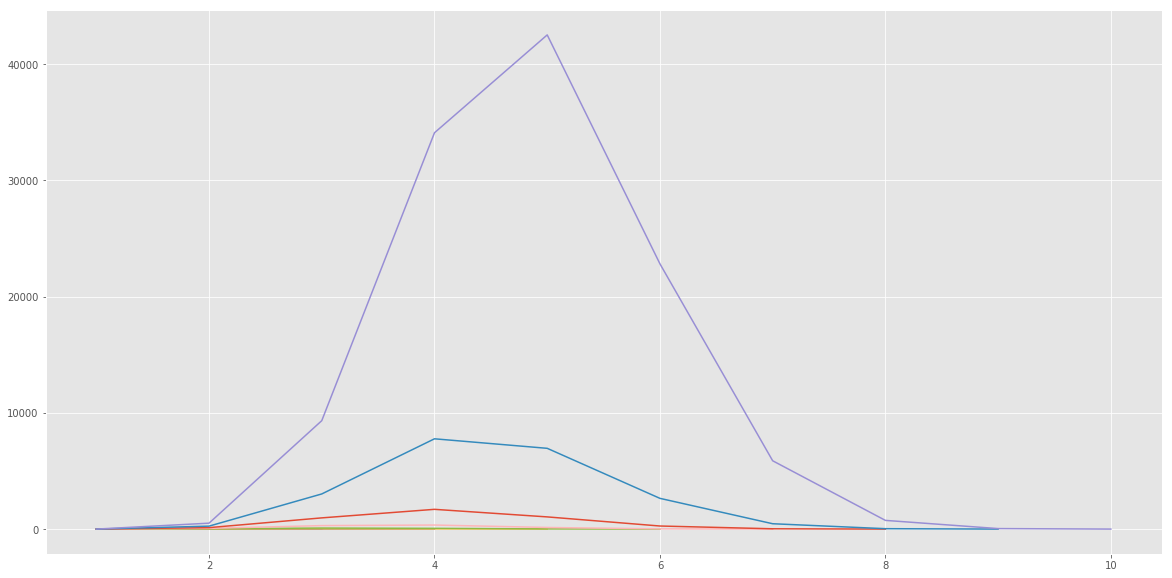

In [579]:
sn.dist_num_partitions()

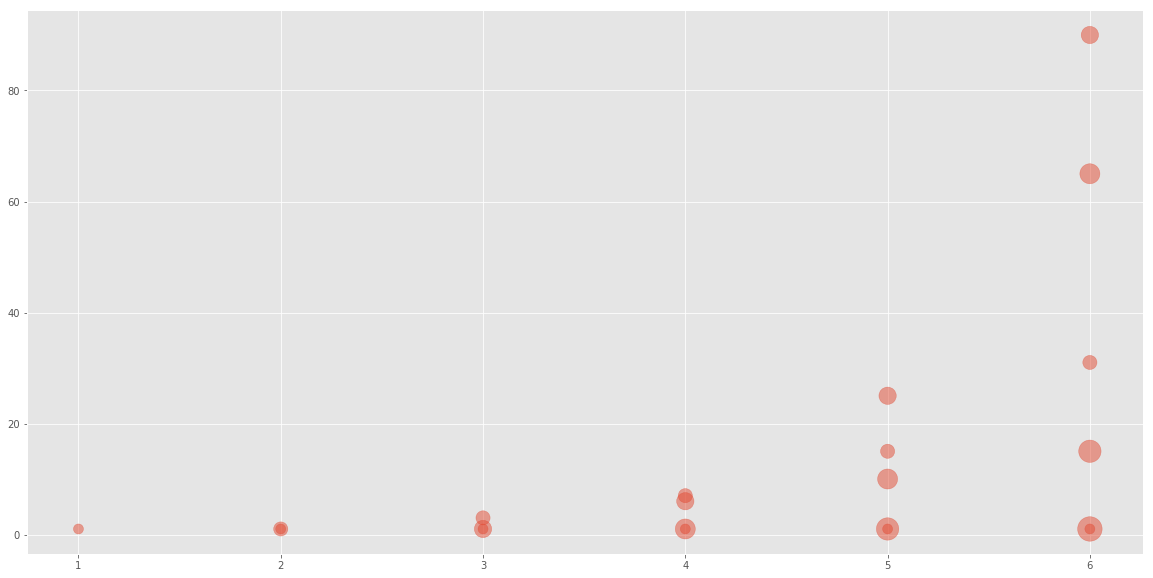

In [556]:
sn.visualize_sterling_2()

In [549]:
print(sn.max_partitions_up_to_n()) 

[1, 1, 3, 7, 25, 90]
